In [1]:
import networkx as nx
import community
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon

In [2]:
import csv
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')
se.head()

,node1,node2,report_name
0,Oil consumption,GHG Emissions (aggregate),Trottier
1,LNG consumption,GHG Emissions (aggregate),Trottier
2,Electricity consumption,GHG Emissions (aggregate),Trottier
3,Biofuels consumption,Oil consumption,Trottier
4,Oil consumption,GHG Emissions (aggregate),Trottier


In [3]:
# Seperating edgelist into different dataframes so that nodes/edges can be manipulated individually
se4 = se.iloc[:192]
se_trot = se.iloc[:30]
se_deep = se.iloc[30:72]
se_neb = se.iloc[72:92]
se_rnrg = se.iloc[92:192]
se_wec = se.iloc[192:]

In [4]:
GSE5 = nx.from_pandas_edgelist(se,'node1','node2',edge_attr=None) # edge_attr not needed
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=None)
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=None) # Individual network for WEC global scenarios
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=None) # Individual network for TEFP
GSE_deep = nx.from_pandas_edgelist(se_deep,'node1','node2',edge_attr=None) # Individual network for DDPC
GSE_neb = nx.from_pandas_edgelist(se_neb,'node1','node2',edge_attr=None) # Individual network for NEB
GSE_rnrg = nx.from_pandas_edgelist(se_rnrg,'node1','node2',edge_attr=None) # Individual network for Re-energizing Canada

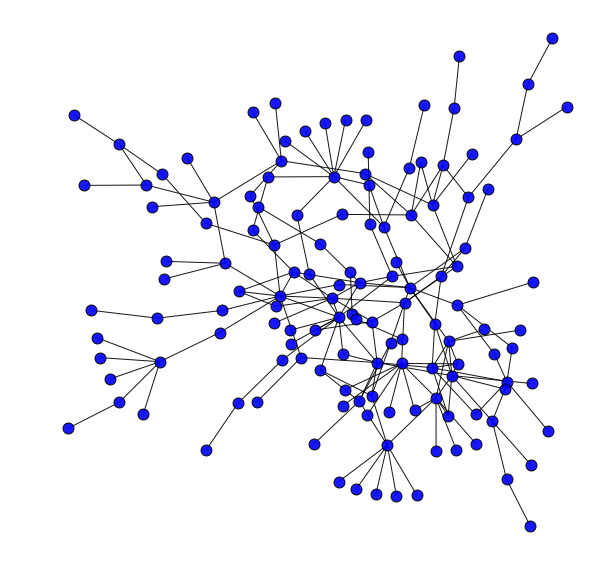

In [5]:
layout = nx.kamada_kawai_layout(GSE5)

plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, alpha=.9, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha=.9)

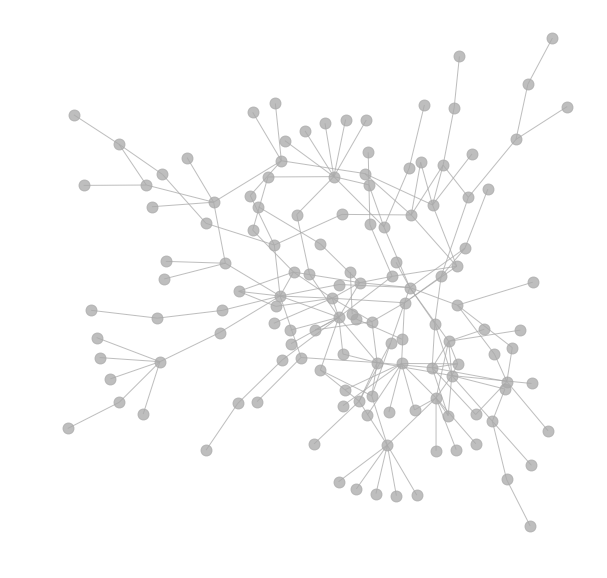

In [6]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.75)

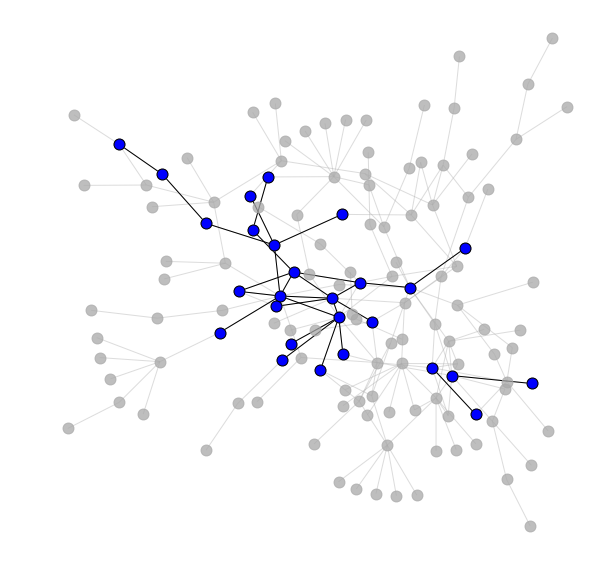

In [7]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)

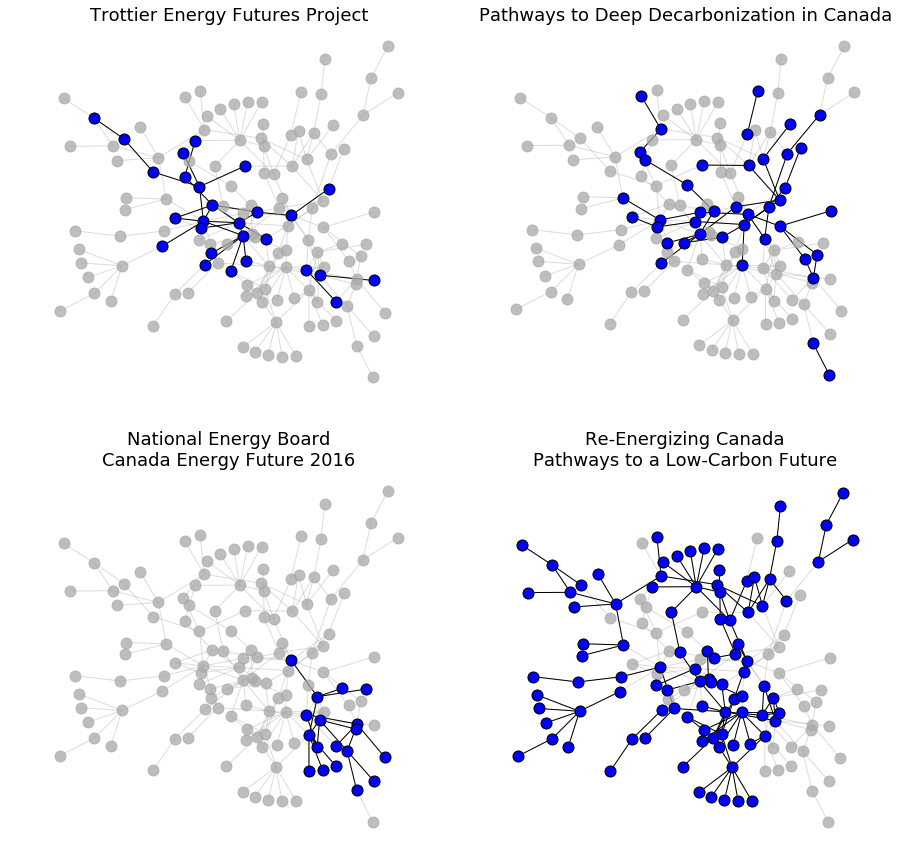

In [8]:
#customization lines for different studies
studytext1 = 'Trottier Energy Futures Project'
studytext2 = 'Pathways to Deep Decarbonization in Canada'
studytext3 = 'National Energy Board\nCanada Energy Future 2016'
studytext4 = 'Re-Energizing Canada\nPathways to a Low-Carbon Future'

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)

plt.subplot(222)
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_deep, layout, edge_color='k',width=1)

plt.subplot(223)
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_neb, layout, edge_color='k',width=1)

plt.subplot(224)
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='k',width=1)

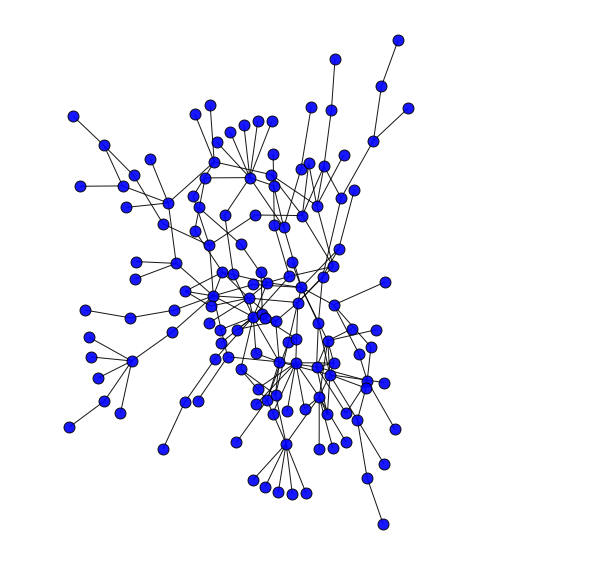

In [9]:
# Examine cross-scales interactions between Canada energy futures and global energy scenarios
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgray', node_size=120, alpha=.0)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgray',width=1, alpha=.0)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, alpha=.9, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha=.9)
plt.savefig('./figures/Pyconca_four_scenarios_blue.png')

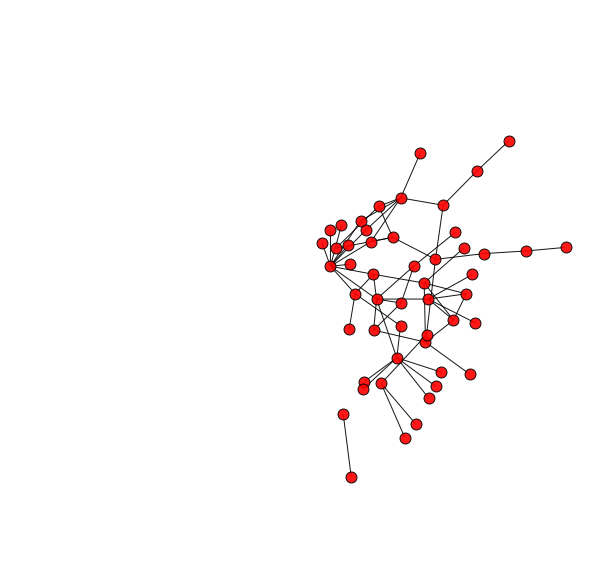

In [10]:
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(GSE5, layout, node_color='darkgray', node_size=120, alpha=.0)
nx.draw_networkx_edges(GSE5, layout, edge_color='darkgray',width=1, alpha=.0)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='r', node_size=120, alpha=.9, edgecolors='k')
nx.draw_networkx_edges(GSE_wec, layout, edge_color='k',width=1, alpha=.9)
plt.savefig('./figures/Pyconca_wec_scenarios_red.png')

In [11]:
def noteLabelSlim(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.03, width=0.1,headwidth=3.5),
        xytext=xy_text, fontsize=myfontsize)
    return

def noteLabel(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)
    return

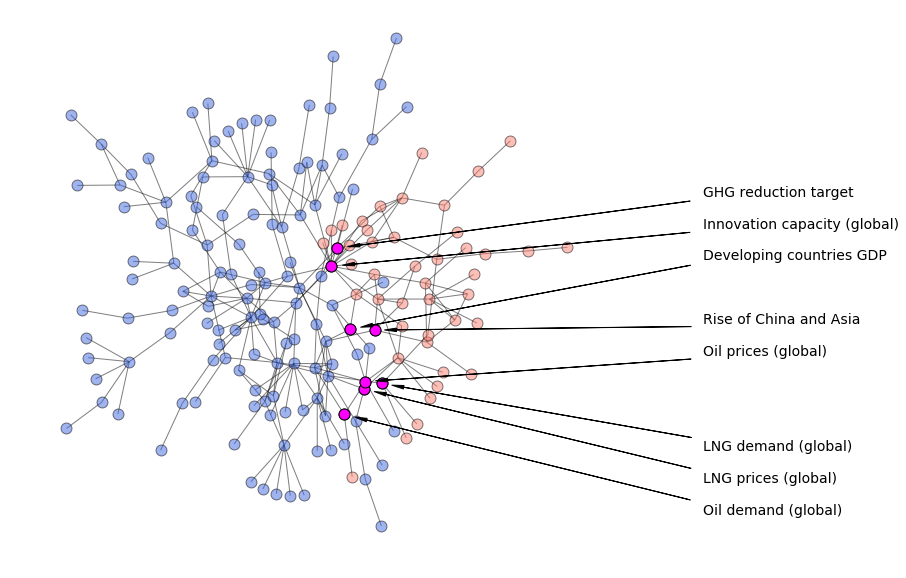

In [49]:
ls1 = list(GSE4.nodes())
ls2 = list(GSE_wec.nodes())
ls3 = set(ls1).intersection(ls2)
GSE_xscale = nx.Graph()
for n in ls3:
    GSE_xscale.add_node(n)
    
plt.figure(figsize=(10,10))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_color='royalblue', node_size=120, edgecolors='k', alpha = .5)
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha = .5)
nx.draw_networkx_nodes(GSE_wec, layout, node_color='salmon', node_size=120, edgecolors='k', alpha = .5)
nx.draw_networkx_edges(GSE_wec, layout, edge_color='k',width=1, alpha = .5)
nx.draw_networkx_nodes(GSE_xscale, layout, node_color='magenta', edgecolors='k',node_size=120)

my_fontsize = 14
noteLabelSlim('GHG reduction target', (1.5,0.3), my_fontsize)
noteLabelSlim('Innovation capacity (global)', (1.5,0.2), my_fontsize)
noteLabelSlim('Developing countries GDP', (1.5,0.1), my_fontsize)
noteLabelSlim('Rise of China and Asia', (1.5,-0.1), my_fontsize)
noteLabelSlim('Oil prices (global)', (1.5,-0.2), my_fontsize)
noteLabelSlim('LNG demand (global)', (1.5,-0.5), my_fontsize)
noteLabelSlim('LNG prices (global)', (1.5,-0.6), my_fontsize)
noteLabelSlim('Oil demand (global)', (1.5,-0.7), my_fontsize)

plt.savefig('./figures/Pyconca_xscale_scenarios.png', bbox_inches='tight')

In [13]:
partition_ca = community.best_partition(GSE4, randomize=False)

In [14]:
def lst_to_area(grp, pos): # grp is the group of the communities, pos is the networkx layout
    grp_area = []
    for n in grp:
        grp_area.append(pos[n])
    return grp_area

def labelanywhere(string_text,xy_loc,xy_text,myfontsize): # for printing text label annotations (arrow)
    plt.annotate(string_text,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)
    return

In [22]:
# Calculate eigenvector and betweenness centraliites for Canada Multi-study Network
eig = nx.eigenvector_centrality(GSE4)
bet = nx.betweenness_centrality(GSE4)

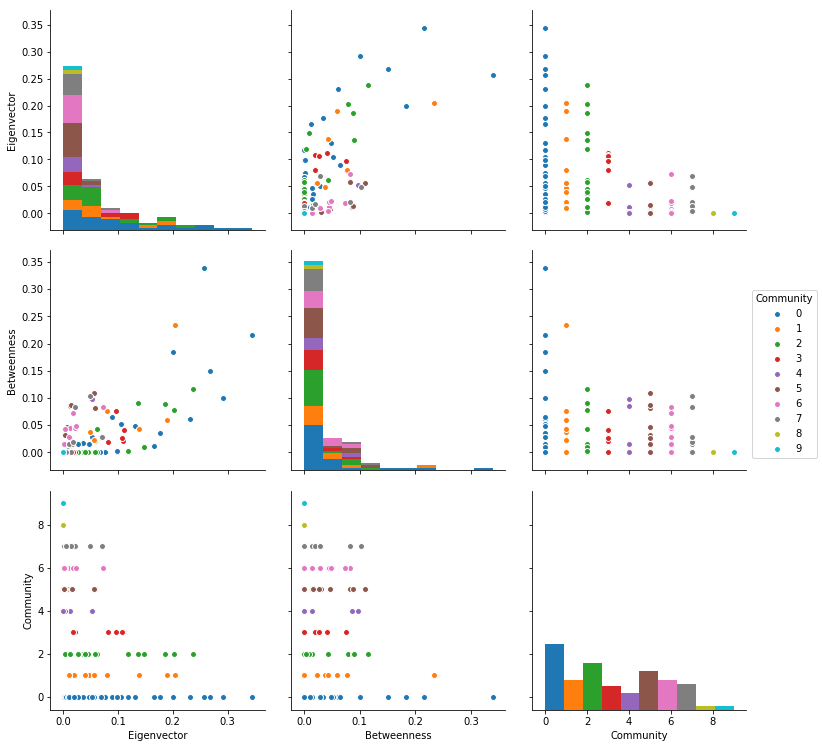

In [24]:
cent_df = pd.DataFrame.from_dict([eig, bet, partition_ca])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Eigenvector', 'Betweenness', 'Community']
cent_df['Community'] = cent_df['Community'].astype(int)
sns.pairplot(cent_df, hue = 'Community', size=3.5)

In [34]:
#cent_df.sort_values('Eigenvector',ascending=False).head(25)
cent_df.sort_values('Betweenness',ascending=False).head(25)

,Eigenvector,Betweenness,Community
GHG Emissions (aggregate),0.256534,0.339049,0
Energy intensity,0.204339,0.233946,1
GHG Emissions (transport),0.344127,0.216002,0
Tech dev in energy storage,0.199930,0.183621,0
Trucking (heavy freight) load,0.267228,0.150394,0
LNG production,0.237551,0.115559,2
Renewable energy generation,0.056670,0.108577,5
Active mobility,0.048277,0.102942,7
Oil consumption,0.291998,0.100315,0
Sectoral coordination,0.052094,0.097289,4


In [50]:
eig_size = [50+1000*eig[n] for n in GSE4.nodes()]
bet_size = [50+1000*bet[n] for n in GSE4.nodes()]

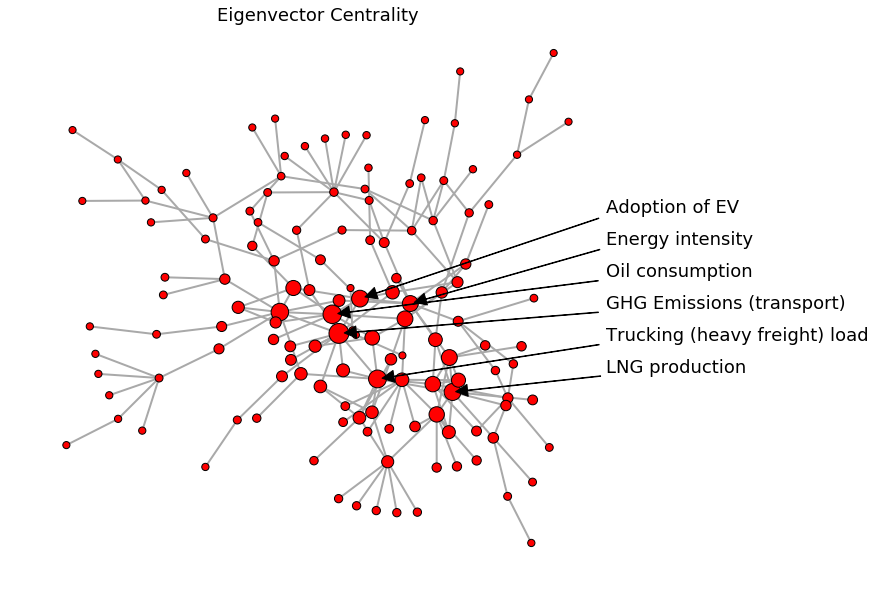

In [51]:
my_fontsize = 18
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Eigenvector Centrality',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='r', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)

noteLabel('Adoption of EV', (0.5,0.3), my_fontsize)
noteLabel('Energy intensity', (0.5,0.2), my_fontsize)
noteLabel('Oil consumption', (0.5,0.1), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.5,0), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.5,-0.1), my_fontsize)
noteLabel('LNG production', (0.5,-0.2), my_fontsize)

plt.savefig('./figures/Pyconca_centrality_plot1.png',bbox_inches='tight')

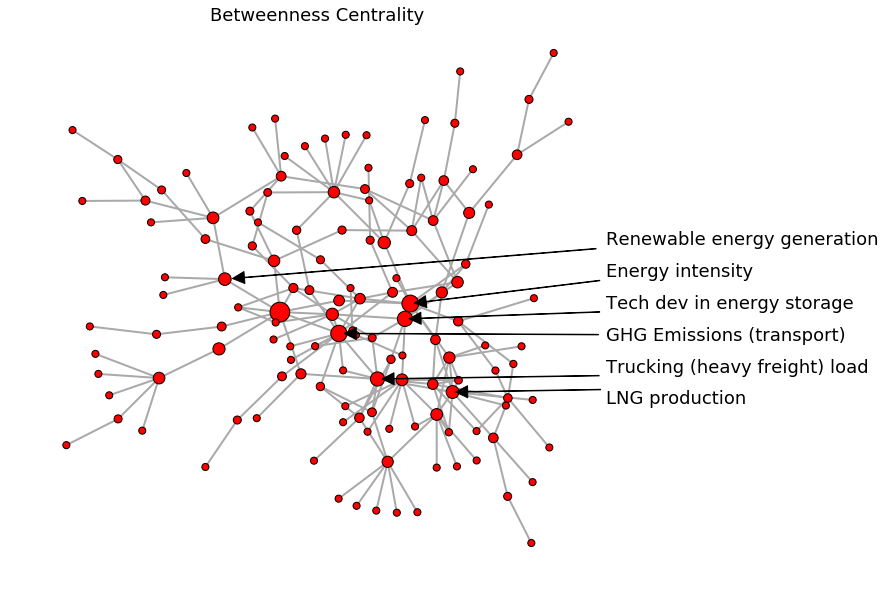

In [52]:
my_fontsize = 18
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Betweenness Centrality',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='r', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgrey',width=2)

noteLabel('Renewable energy generation', (0.5,0.2), my_fontsize)
noteLabel('Energy intensity', (0.5,0.1), my_fontsize)
noteLabel('Tech dev in energy storage', (0.5,0.0), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.5,-0.1), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.5,-0.2), my_fontsize)
noteLabel('LNG production', (0.5,-0.3), my_fontsize)

plt.savefig('./figures/Pyconca_centrality_plot2.png',bbox_inches='tight')

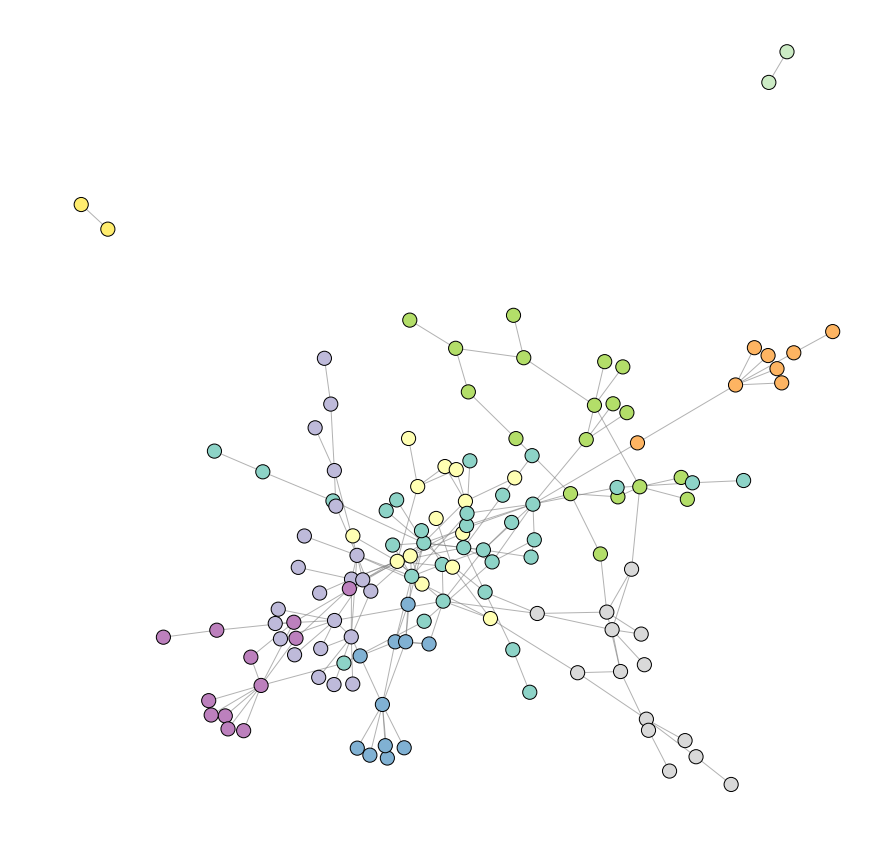

In [42]:
colors = [partition_ca[n] for n in GSE4.nodes()]
my_colors = plt.cm.Set3
my_fontsize = 14
layout = nx.spring_layout(GSE4, random_state=8)

plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, node_color=colors, cmap=my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)
plt.savefig('./figures/Pyconca_Community_ca_1.png')

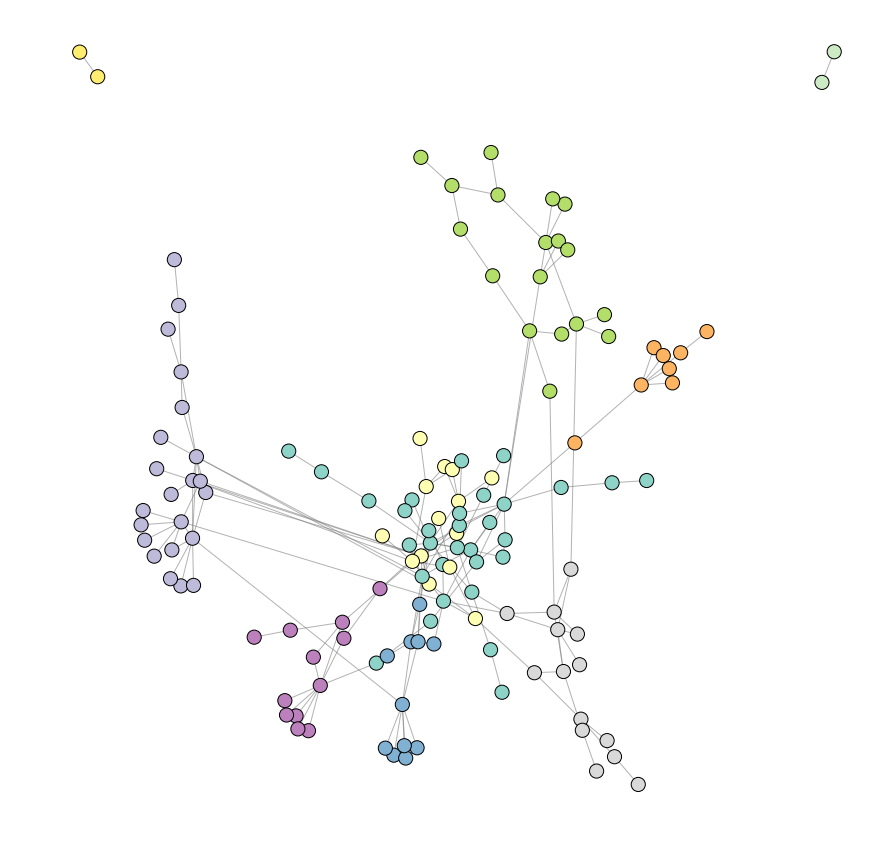

In [16]:
# Manually adjust layout position for group 2,5 and 8
layout = nx.spring_layout(GSE4, random_state=8)

checklist = [n for n in partition_ca if partition_ca[n]==2]
for n in checklist:
    layout[n] = layout[n] + ([-0.50,0.2])

checklist = [n for n in partition_ca if partition_ca[n]==5]
for n in checklist:
    layout[n] = layout[n] + ([0.0,0.33])

checklist = [n for n in partition_ca if partition_ca[n]==8]
for n in checklist:
    layout[n] = layout[n] + ([0.419,0.0])

checklist = [n for n in partition_ca if partition_ca[n]==9]
for n in checklist:
    layout[n] = layout[n] + ([-0.315,0.309])
    
plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, node_color=colors, cmap=my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)
plt.savefig('./figures/Pyconca_Community_ca_2.png')

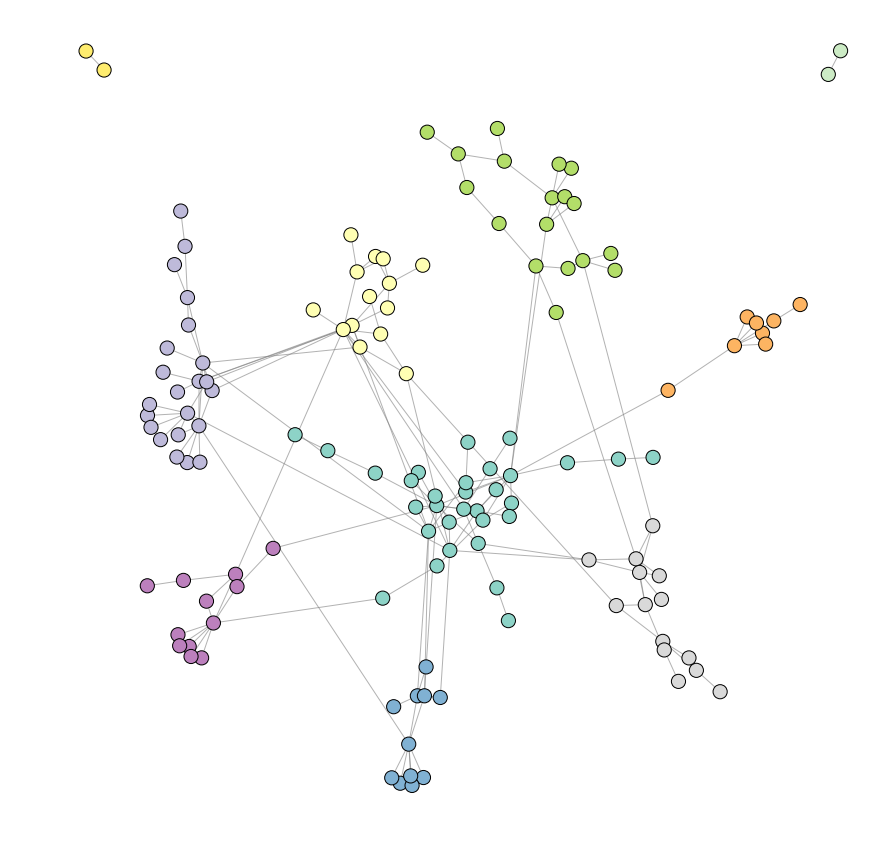

In [17]:
# Manually adjust layout position for all groups
layout = nx.spring_layout(GSE4, random_state=8)

checklist = [n for n in partition_ca if partition_ca[n]==0]
for n in checklist:
    layout[n] = layout[n] + ([-0.0,-0.20])

checklist = [n for n in partition_ca if partition_ca[n]==1]
for n in checklist:
    layout[n] = layout[n] + ([-0.2,0.3])

checklist = [n for n in partition_ca if partition_ca[n]==2]
for n in checklist:
    layout[n] = layout[n] + ([-0.50,0.2])

checklist = [n for n in partition_ca if partition_ca[n]==3]
for n in checklist:
    layout[n] = layout[n] + ([0.0,-0.5])

checklist = [n for n in partition_ca if partition_ca[n]==4]
for n in checklist:
    layout[n] = layout[n] + ([0.23,-0.1])
    
checklist = [n for n in partition_ca if partition_ca[n]==5]
for n in checklist:
    layout[n] = layout[n] + ([0.0,0.33])

checklist = [n for n in partition_ca if partition_ca[n]==6]
for n in checklist:
    layout[n] = layout[n] + ([0.2,-0.2])

checklist = [n for n in partition_ca if partition_ca[n]==7]
for n in checklist:
    layout[n] = layout[n] + ([-0.3,-0.22])
    
checklist = [n for n in partition_ca if partition_ca[n]==8]
for n in checklist:
    layout[n] = layout[n] + ([0.419,0.0])

checklist = [n for n in partition_ca if partition_ca[n]==9]
for n in checklist:
    layout[n] = layout[n] + ([-0.315,0.309])
    
plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, node_color=colors, cmap=my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)
plt.savefig('./figures/Pyconca_Community_ca_3.png')

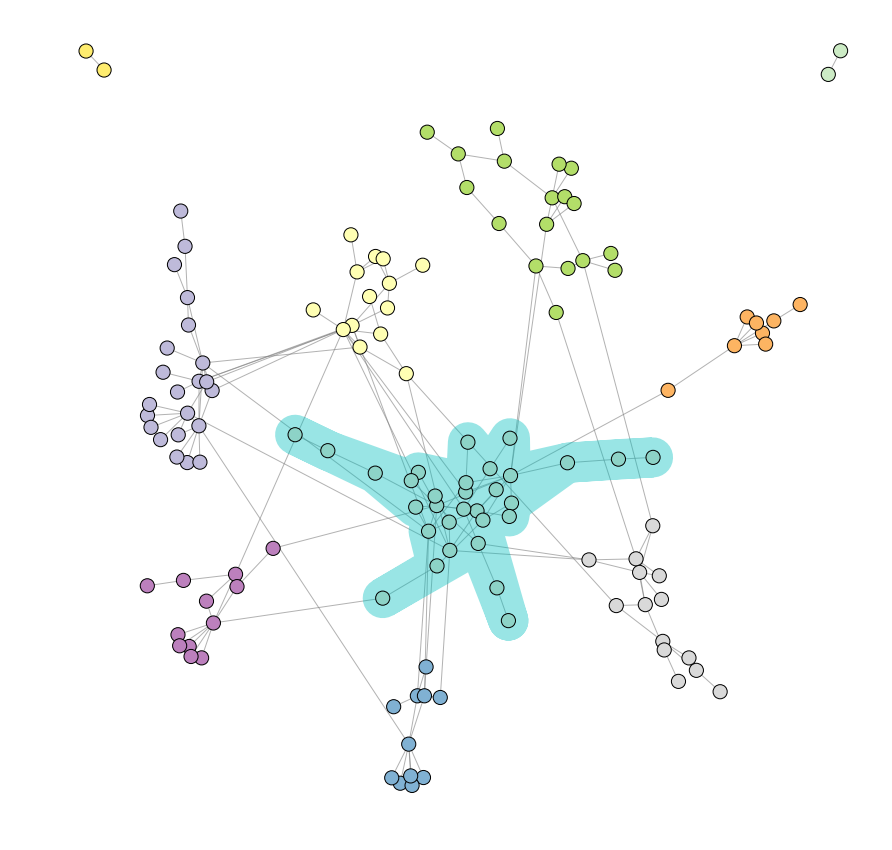

In [18]:
# Create polygon patches for group 0
grp0_lst = ['Trucking (heavy freight) load','Electricity consumption (residential)',
            'Use of electrical appliances','Tech dev in green transport',
            'Regulatory standard for green transport','Emerging green transport businesses',
            'Regulatory standard for green transport','Oil consumption',
            'Biofuels consumption','LNG consumption','Management of natural resources',
            'Indigenous knowledge','Energy studies scholarship','Management of natural resources',
            'GHG Emissions (aggregate)','Transport modal shift','Energy intensity (transport)',
            'Waste to energy tech dev','Biogas production','Biofuels consumption (Freight)',
            'Electrification of light freight transport','Intercity (people) mobility',
            'Rail infrastructure','Electrification of rail transport','Freight (trade) volume',
            'Health issues for indigenous communities','Blending target policy mandate',
            'Tech dev in green transport']
grp0_area = lst_to_area(grp0_lst, layout)
grp0 = Polygon(grp0_area,closed=True, fill=False,ec='c',joinstyle='round',lw=40,alpha=0.4)

plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, node_color=colors, cmap=my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)

plt.gca().add_patch(grp0)

plt.savefig('./figures/Pyconca_Community_ca_4.png')

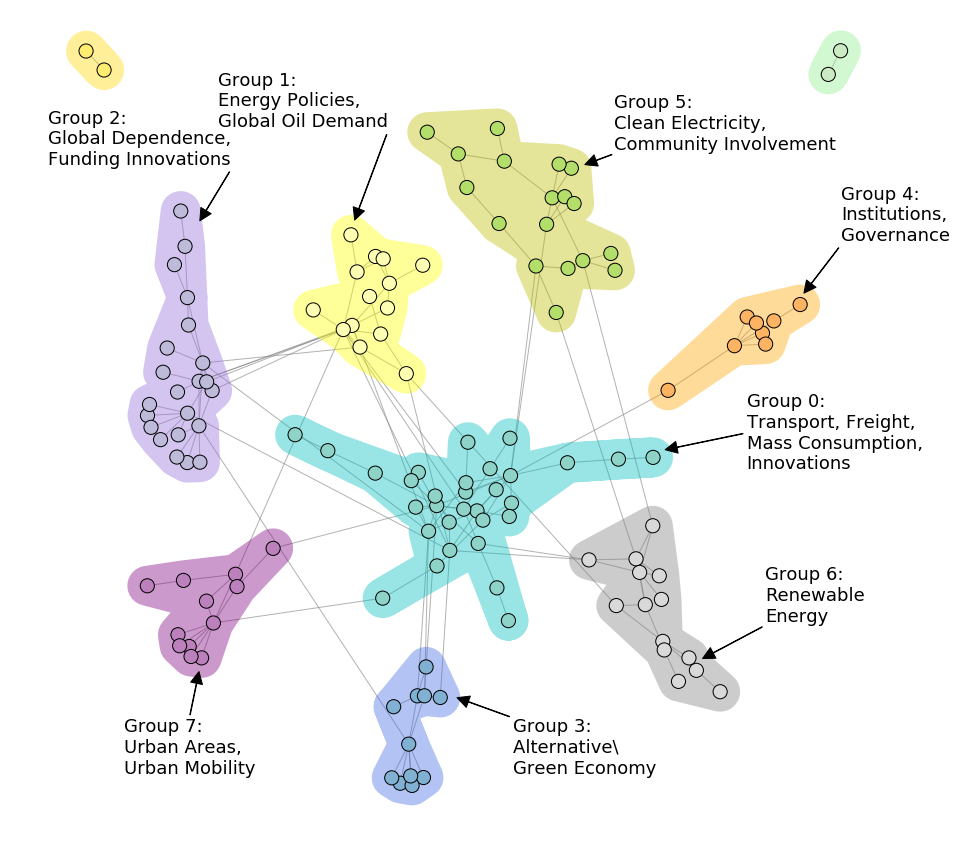

In [19]:
# Create polygon patches for each groups
grp0_lst = ['Trucking (heavy freight) load','Electricity consumption (residential)',
            'Use of electrical appliances','Tech dev in green transport',
            'Regulatory standard for green transport','Emerging green transport businesses',
            'Regulatory standard for green transport','Oil consumption',
            'Biofuels consumption','LNG consumption','Management of natural resources',
            'Indigenous knowledge','Energy studies scholarship','Management of natural resources',
            'GHG Emissions (aggregate)','Transport modal shift','Energy intensity (transport)',
            'Waste to energy tech dev','Biogas production','Biofuels consumption (Freight)',
            'Electrification of light freight transport','Intercity (people) mobility',
            'Rail infrastructure','Electrification of rail transport','Freight (trade) volume',
            'Health issues for indigenous communities','Blending target policy mandate',
            'Tech dev in green transport']
grp0_area = lst_to_area(grp0_lst, layout)
grp0 = Polygon(grp0_area,closed=True, fill=False,ec='c',joinstyle='round',lw=40,alpha=0.4)

grp1_lst = ['Building retrofit incentives','Energy efficiency policy mandate',
            'GHG Emissions (agriculture)','Tech dev in artifical intelligence',
            'GHG Emissions (oil and gas)','Tech dev in low carbon system','Energy intensity',
            'GHG reduction target','Oil demand (global)','Oil prices (global)',
            'LNG production (USA)','Energy tech change (building)','Energy tech change (transport)']
grp1_area = lst_to_area(grp1_lst, layout)
grp1 = Polygon(grp1_area,closed=True, fill=False,ec='yellow',joinstyle='round',lw=40,alpha=0.4)

grp2_lst = ['LNG demand (global)','Developing countries GDP','Rise of China and Asia',
            'R&D funding from government','Tech dev in energy efficiency','Educational attainment',
            'Economic productivity','LNG infrastructures development','Population',
            'Oil infrastructures development','GDP','Innovation capacity','USA Economy',
            'LNG production','LNG prices (global)','LNG demand','Gas-fired generation',
            'LNG demand (USA)','LNG demand (USA/Canada)']
grp2_area = lst_to_area(grp2_lst, layout)
grp2 = Polygon(grp2_area,closed=True, fill=False,ec='mediumpurple',joinstyle='round',lw=40,alpha=0.4)

grp3_lst = ['Feedstock (biofuel) supply','Biorefinery strategy',
            'Forest production','Food prices','Transition to decarbonized economy',
            'Fishery production','Biotech production','High-tech manufacturing production',
            'Sustainable social change','Transition to decarbonized economy','Food prices']
grp3_area = lst_to_area(grp3_lst, layout)
grp3 = Polygon(grp3_area,closed=True, fill=False,ec='royalblue',joinstyle='round',lw=40,alpha=0.4)

grp4_lst = ['Tech dev in green transport (rail)','Gov budget for energy transition',
            'Multilevel governance','Low carbon energy governance','Sectoral coordination',
            'Institutions framework']
grp4_area = lst_to_area(grp4_lst, layout)
grp4 = Polygon(grp4_area,closed=True, fill=False,ec='orange',joinstyle='round',lw=40,alpha=0.4)

grp5_lst = ['Wind power generation','New clean tech generation','Geographic availability',
            'Electrification policy','Renewable energy generation',
            'Employment for indigenous communities','Participatory planning',
            'Participatory visioning','Environmental impacts','Road infrastructure',
            'Harmonize elect generation load profile','Inter-province HV infrastructure',
            'Inter-province electricity trade','Hydro electric generation','Environmental impacts',
            'Inter-province HV infrastructure','Social acceptance','Hydro electric generation',
            'New clean tech generation','GHG Emissions (electricity)','GHG Emissions (electricity)']
grp5_area = lst_to_area(grp5_lst, layout)
grp5 = Polygon(grp5_area,closed=True, fill=False,ec='y',joinstyle='round',lw=40,alpha=0.4)

grp6_lst = ['Energy production cost','Large-scale hydropower construction','Solar power generation',
            'GHG Emissions (building)','District cooling/heating',
            'Wooden buildings','Carbon sink','Enterprenuership in private sector',
            'Tech investment','Tech dev in renewable energy','Solar power production cost',
            'Innovation capacity (global)']
grp6_area = lst_to_area(grp6_lst, layout)
grp6 = Polygon(grp6_area,closed=True, fill=False,ec='grey',joinstyle='round',lw=40,alpha=0.4)

grp7_lst = ['Shared mobility','Active mobility','Carbon intensity',
            'Banning coal/oil-fired generation','Urban green infrastructure',
            'House size','Urbanization','Number of passenger per vehicle',
            'Road speed limit','Energy consumption','Distance travel']
grp7_area = lst_to_area(grp7_lst, layout)
grp7 = Polygon(grp7_area,closed=True, fill=False,ec='purple',joinstyle='round',lw=40,alpha=0.4)

grp8_lst = ['Climate change','Loss of biodiversity']
grp8_area = lst_to_area(grp8_lst, layout)
grp8_area.append(grp8_area[0]+[0.001,0.001])
grp8 = Polygon(grp8_area,closed=True,fill=False,ec='lightgreen',joinstyle='round',lw=40,alpha=0.4)

grp9_lst = ['Partnership with automotive industry','Tech dev in green transport (freight)']
grp9_area = lst_to_area(grp9_lst, layout)
grp9_area.append(grp9_area[0]+[0.001,0.001])
grp9 = Polygon(grp9_area,closed=True,fill=False,ec='gold',joinstyle='round',lw=40,alpha=0.4)

plt.figure(figsize=(15,15))
plt.axis('off')
nx.draw_networkx_nodes(GSE4, layout, node_size=200, node_color=colors, cmap = my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='grey',width=1, alpha=0.6)

plt.gca().add_patch(grp0)
plt.gca().add_patch(grp1)
plt.gca().add_patch(grp2)
plt.gca().add_patch(grp3)
plt.gca().add_patch(grp4)
plt.gca().add_patch(grp5)
plt.gca().add_patch(grp6)
plt.gca().add_patch(grp7)
plt.gca().add_patch(grp8)
plt.gca().add_patch(grp9)

labelanywhere('Group 0:\nTransport, Freight,\nMass Consumption,\nInnovations',(0.53,-0.05),(0.75,-0.1),18)
labelanywhere('Group 1:\nEnergy Policies,\nGlobal Oil Demand',(-0.29,0.55),(-0.65,0.8),18)
labelanywhere('Group 2:\nGlobal Dependence,\nFunding Innovations',(-0.7,0.55),(-1.1,0.7),18)
labelanywhere('Group 3:\nAlternative\ \nGreen Economy',(-0.02,-0.7),(0.13,-0.9),18)
labelanywhere('Group 4:\nInstitutions,\nGovernance',(0.9,0.36),(1,0.5),18)
labelanywhere('Group 5:\nClean Electricity,\nCommunity Involvement',(0.32,0.7),(0.4,0.74),18)
labelanywhere('Group 6:\nRenewable\nEnergy',(0.63,-0.6),(0.8,-0.5),18)
labelanywhere('Group 7:\nUrban Areas,\nUrban Mobility',(-0.7,-0.63),(-0.9,-0.9),18)

plt.savefig('./figures/Pyconca_Community_ca_5.png')

In [20]:
partition_world = community.best_partition(GSE_wec, randomize=False)

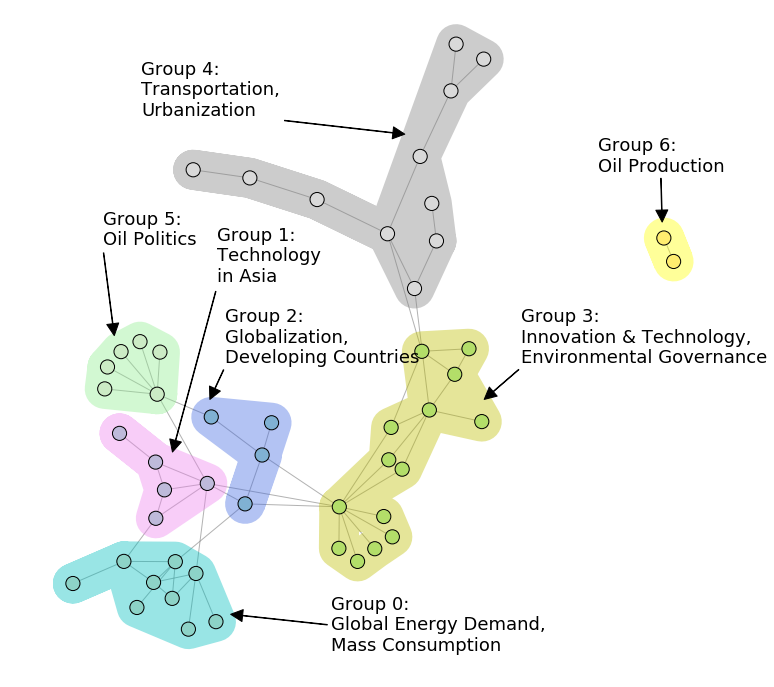

In [21]:
my_fontsize = 12
colors = [partition_world[n] for n in GSE_wec.nodes()]
my_colors = plt.cm.Set3 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html
layout = nx.spring_layout(GSE_wec, random_state=26)

# Move group 3 in green
checklist = [n for n in partition_world if partition_world[n]==3]
for n in checklist:
    layout[n] = layout[n] + ([0.05,-0.1])

# Create polygon patches for each groups
grp0_lst = ['Energy intensity (global)','Growing middle class (global)',
            'Educational attainment (global)','Economic investment (global)',
            'Energy value chain (global)','Energy demand (global)',
            'Labor force (global)','Growing middle class (global)',
            'Mass consumption (global)','Growing middle class (global)']
grp0_area = lst_to_area(grp0_lst, layout)
grp0 = Polygon(grp0_area, closed=True, fill=False, ec='c',joinstyle='round',lw=40,alpha=0.4)

grp1_lst = ['Energy production cost (global)','Rate of energy tech change (global)',
            'Tech investment (global)','Rise of China and Asia','GDP (global)',
            'Rate of energy tech change (global)']
grp1_area = lst_to_area(grp1_lst, layout)
grp1 = Polygon(grp1_area, closed=True, fill=False, ec='violet',joinstyle='round',lw=40,alpha=0.4)

grp2_lst = ['Globalization','Tech dev in ICT (global)',
            'Economic productivity (global)','Developing countries GDP',
            'Globalization']
grp2_area = lst_to_area(grp2_lst, layout)
grp2 = Polygon(grp2_area, closed=True, fill=False, ec='royalblue',joinstyle='round',lw=40,alpha=0.4)

grp3_lst = ['Innovation capacity (global)','Tech dev in data analytics (global)',
            'Tech dev in articifical intelligence (global)','Tech dev in machine learning (global)',
            'Tech dev in renewable energy (global)','Tech dev in energy storage (global)',
            'Innovation capacity (global)','Tech dev in energy efficiency (global)',
            'Environmental consciousness (global)','Electrification of rail transport (global)',
            'Global environmental institution','GHG reduction target',
            'Carbon intensity (global)','Environmental consciousness (global)',
            'Tech dev in low carbon system (global)','Tech dev in green transport (global)',
            'Innovation capacity (global)']
grp3_area = lst_to_area(grp3_lst, layout)
grp3 = Polygon(grp3_area, closed=True, fill=False, ec='y',joinstyle='round',lw=40,alpha=0.4)

grp4_lst = ['GHG Emissions (global)','Renewable energy generation (global)',
           'Health risk awareness (global)','Nuclear power generation (global)',
           'Health risk awareness (global)','Renewable energy generation (global)',
           'GHG Emissions (global)','Adoption of EV (global)',
           'Electricity demand (global)','GHG Emissions (global)',
            'Electricity demand (global)','Urbanization (global)',
           'Fuel switching (global)','LNG demand (global)',
           'Gasification of marine feeder transport (global)',
           'Gasification of heavy freight transport (global)']
grp4_area = lst_to_area(grp4_lst, layout)
grp4 = Polygon(grp4_area, closed=True, fill=False, ec='grey',joinstyle='round',lw=40,alpha=0.4)

grp5_lst = ['Geopolitical tensions','Technology transfer (global)',
            'LNG prices (global)','Geopolitical tensions',
            'LNG prices (global)','Oil prices (global)',
            'Global institutions','Stability of Middle Eastern region']
grp5_area = lst_to_area(grp5_lst, layout)
grp5 = Polygon(grp5_area, closed=True, fill=False, ec='lightgreen',joinstyle='round',lw=40,alpha=0.4)

grp6_lst = ['Oil production (global)','Oil demand (global)']
grp6_area = lst_to_area(grp6_lst, layout)
grp6_area.append(grp6_area[0]+[0.001,0.001])
grp6 = Polygon(grp6_area, closed=True, fill=False, ec='yellow',joinstyle='round',lw=40,alpha=0.4)

plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx_nodes(GSE_wec, layout, node_size=200, node_color=colors, cmap = my_colors, edgecolors='k')
nx.draw_networkx_edges(GSE_wec, layout, edge_color='grey',width=1, alpha=0.6)

# Plot all the patches
plt.gca().add_patch(grp0)
plt.gca().add_patch(grp1)
plt.gca().add_patch(grp2)
plt.gca().add_patch(grp3)
plt.gca().add_patch(grp4)
plt.gca().add_patch(grp5)
plt.gca().add_patch(grp6)

labelanywhere('Group 0:\nGlobal Energy Demand,\nMass Consumption',(-0.17,-0.6),(0.1,-0.7),18)
labelanywhere('Group 1:\nTechnology\nin Asia',(-0.32,-0.17),(-0.2,0.3),18)
labelanywhere('Group 2:\nGlobalization,\nDeveloping Countries',(-0.22,-0.02),(-0.18,0.08),18)
labelanywhere('Group 3:\nInnovation & Technology,\nEnvironmental Governance',(0.5,-0.02),(0.6,0.08),18)
labelanywhere('Group 4:\nTransportation,\nUrbanization',(0.3,0.7),(-0.4,0.75),18)
labelanywhere('Group 5:\nOil Politics',(-0.47,0.15),(-0.5,0.4),18)
labelanywhere('Group 6:\nOil Production',(0.97,0.46),(0.8,0.6),18)

plt.savefig('./figures/Pyconca_Community_ca_6.png')